Автор работы: Иванов Илья Игоревич

Вариант: 8

Тема: Парсинг сайта https://infourok.ru/

Подтема: Курсы повышения квалификации: Название, количество часов, количество регионов

https://infourok.ru/kursy/search?CourseSearchForm%5Bsearch%5D=&CourseSearchForm%5BisOrderByDatePublish%5D=&CourseSearchForm%5Btype%5D%5B%5D=ПК&utm_source=glavnaya&utm_medium=o-proekte-plitki&utm_campaign=kursy-pk

# Монтируем гугл диск

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Импортируем и устанавливаем необходимые библиотеки

In [ ]:
!pip install selenium

In [ ]:
!pip install webdriver-manager

In [ ]:
from selenium import webdriver
import time
#import codecs
from bs4 import BeautifulSoup
import pandas as pd
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.options import Options
from webdriver_manager.chrome import ChromeDriverManager

!apt-get update
!apt-get install chromium chromium-driver
!pip3 install selenium

Hit:1 http://deb.debian.org/debian buster InRelease
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:3 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:4 http://deb.debian.org/debian buster-updates InRelease
Hit:5 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:7 http://deb.debian.org/debian-security buster/updates InRelease
Hit:8 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:9 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:10 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Hit:11 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:12 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:13 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Reading package lists... Done
Reading package lists... Done
Building dependency t

In [ ]:
%%shell
# Ubuntu no longer distributes chromium-browser outside of snap
#
# Proposed solution: https://askubuntu.com/questions/1204571/how-to-install-chromium-without-snap

# Add debian buster
cat > /etc/apt/sources.list.d/debian.list <<'EOF'
deb [arch=amd64 signed-by=/usr/share/keyrings/debian-buster.gpg] http://deb.debian.org/debian buster main
deb [arch=amd64 signed-by=/usr/share/keyrings/debian-buster-updates.gpg] http://deb.debian.org/debian buster-updates main
deb [arch=amd64 signed-by=/usr/share/keyrings/debian-security-buster.gpg] http://deb.debian.org/debian-security buster/updates main
EOF

# Add keys
apt-key adv --keyserver keyserver.ubuntu.com --recv-keys DCC9EFBF77E11517
apt-key adv --keyserver keyserver.ubuntu.com --recv-keys 648ACFD622F3D138
apt-key adv --keyserver keyserver.ubuntu.com --recv-keys 112695A0E562B32A

apt-key export 77E11517 | gpg --dearmour -o /usr/share/keyrings/debian-buster.gpg
apt-key export 22F3D138 | gpg --dearmour -o /usr/share/keyrings/debian-buster-updates.gpg
apt-key export E562B32A | gpg --dearmour -o /usr/share/keyrings/debian-security-buster.gpg

# Prefer debian repo for chromium* packages only
# Note the double-blank lines between entries
cat > /etc/apt/preferences.d/chromium.pref << 'EOF'
Package: *
Pin: release a=eoan
Pin-Priority: 500


Package: *
Pin: origin "deb.debian.org"
Pin-Priority: 300


Package: chromium*
Pin: origin "deb.debian.org"
Pin-Priority: 700
EOF

# Install chromium and chromium-driver
apt-get update
apt-get install chromium chromium-driver

# Install selenium
pip install selenium

Executing: /tmp/apt-key-gpghome.yxw6luqgnZ/gpg.1.sh --keyserver keyserver.ubuntu.com --recv-keys DCC9EFBF77E11517
gpg: key DCC9EFBF77E11517: "Debian Stable Release Key (10/buster) <debian-release@lists.debian.org>" not changed
gpg: Total number processed: 1
gpg:              unchanged: 1
Executing: /tmp/apt-key-gpghome.UKddNu93oa/gpg.1.sh --keyserver keyserver.ubuntu.com --recv-keys 648ACFD622F3D138
gpg: key DC30D7C23CBBABEE: "Debian Archive Automatic Signing Key (10/buster) <ftpmaster@debian.org>" not changed
gpg: Total number processed: 1
gpg:              unchanged: 1
Executing: /tmp/apt-key-gpghome.z8re30KMjV/gpg.1.sh --keyserver keyserver.ubuntu.com --recv-keys 112695A0E562B32A
gpg: key 4DFAB270CAA96DFA: "Debian Security Archive Automatic Signing Key (10/buster) <ftpmaster@debian.org>" not changed
gpg: Total number processed: 1
gpg:              unchanged: 1
gpg: cannot open '/dev/tty': No such device or address
gpg: [stdout]: write error: Broken pipe
gpg: filter_flush failed on c

In [ ]:
import requests
import time
from selenium.common.exceptions import TimeoutException

In [ ]:
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.chrome.service import Service
url = "https://infourok.ru/kursy/search?CourseSearchForm%5Bsearch%5D=&CourseSearchForm%5BisOrderByDatePublish%5D=&CourseSearchForm%5Btype%5D%5B%5D=ПК&utm_source=glavnaya&utm_medium=o-proekte-plitki&utm_campaign=kursy-pk"

service = Service(executable_path=r'/usr/bin/chromedriver')
options = webdriver.ChromeOptions()
options.add_argument('--headless')
options.add_argument('--no-sandbox')
options.add_argument('--disable-dev-shm-usage')
driver = webdriver.Chrome(service=service, options=options)


In [ ]:
driver.get(url)
print(driver.title)

Официальный сайт ООО «Инфоурок» - курсы, тесты, вебинары, материалы для учителей


## Прокрутка страницы до конца

In [ ]:
while True:
    last_height = driver.execute_script("return document.body.scrollHeight")
    driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
    time.sleep(3)
    new_height = driver.execute_script("return document.body.scrollHeight")
    if new_height == last_height:
        break

## Сбор данных со страницы

In [ ]:
import re
import numpy as np

courses = []

items = driver.find_elements(By.CSS_SELECTOR, '.course-popular__item')

for item in items:
    course_name_element = item.find_element(By.CSS_SELECTOR, '.course-popular__title a')
    course_name = course_name_element.text.strip()

    # Проверяем наличие элемента с информацией о формате курса
    try:
      format_element = item.find_element(By.CSS_SELECTOR, '.course-popular__format')
      if format_element:
          format_text = format_element.text.strip()
          course_name += f' ({format_text})'
    except:
      pass

    course_time_element = item.find_element(By.CSS_SELECTOR, '.course-popular__time')
    course_time = course_time_element.text.strip()

    # Найдем родительский элемент для получения доступа к элементам с информацией о курсе
    wrapper_element = item.find_element(By.CSS_SELECTOR, '.course-popular__wrapper')

    # Извлекаем информацию о количестве регионов с помощью регулярного выражения
    statistics_elements = wrapper_element.find_elements(By.CSS_SELECTOR, '.course-popular__data')

    if statistics_elements:
        regions_count_text = statistics_elements[0].text.strip()
        regions_count_match = re.search(r'из\s+(\d+)\s*регион', regions_count_text)
        if regions_count_match:
            regions_count = regions_count_match.group(1)
        else:
            regions_count = np.nan
    else:
        regions_count = np.nan

    courses.append((course_name, course_time, regions_count))
    print(course_name, course_time, regions_count)

for course in courses:
    print(f"Название курса: {course[0]}")
    print(f"Количество часов: {course[1]}")
    print(f"Количество регионов: {course[2]}")
    print("-" * 30)

Выходные данные были обрезаны до нескольких последних строк (5000).
Название курса: Проектный менеджмент
Количество часов: 72 ч.
Количество регионов: nan
------------------------------
Название курса: Производство сыра: технологии производства сырного продукта
Количество часов: 144 ч.
Количество регионов: nan
------------------------------
Название курса: Противодействие коррупции: механизмы борьбы и профилактика коррупционных нарушений
Количество часов: 36 ч.
Количество регионов: nan
------------------------------
Название курса: Профессиональная компетентность педагогов в условиях внедрения ФГОС
Количество часов: 36 ч. — 144 ч.
Количество регионов: 16
------------------------------
Название курса: Профилактика синдрома «профессионального выгорания» у педагогов
Количество часов: 72/108 ч.
Количество регионов: 40
------------------------------
Название курса: Процесс изготовления зубочисток
Количество часов: 72 ч.
Количество регионов: nan
------------------------------
Название курса: 

In [ ]:
len(courses)

2471

In [ ]:
unique_courses = set(courses)
print("Количество уникальных курсов:", len(unique_courses))

Количество уникальных курсов: 2471


Все названия собранных курсов уникальные

# Создание датафрейма и запись в файл CSV

In [ ]:
df = pd.DataFrame(courses, columns=['Название курса', 'Количество часов', 'Количество регионов'])
df.to_csv('/content/drive/MyDrive/Datasets/courses_data.csv', index=False)

## Закрытие веб-драйвера

In [ ]:
driver.quit()

# Чтение CSV-файла и вывод его содержимого на экран

In [ ]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/content/drive/MyDrive/Datasets/courses_data.csv')
df

,Название курса,Количество часов,Количество регионов
0,Оказание первой помощи в образовательной орган...,36/72 ч.,83.0
1,Личный бренд,36 ч. — 180 ч.,79.0
2,Организация работы с обучающимися с ограниченн...,36/72 ч.,85.0
3,"Коррекция речевых особенностей: дислалия, диза...",36 ч.,76.0
4,Искусственный интеллект и нейросети: создание ...,36 ч. — 180 ч.,81.0
...,...,...,...
2466,Эксплуатация механического катка в процессе до...,72 ч.,NaN
2467,Эксплуатация паровой передвижной депарафинизац...,180 ч.,NaN
2468,"Эксплуатация, обслуживание и капитальный ремон...",36 ч.,NaN
2469,Экструзия в пищевой промышленности: особенност...,72 ч.,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2471 entries, 0 to 2470
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Название курса       2471 non-null   object 
 1   Количество часов     2471 non-null   object 
 2   Количество регионов  811 non-null    float64
dtypes: float64(1), object(2)
memory usage: 58.0+ KB


В столбце "Количество регионов" есть пропущенные значения

In [ ]:
df.describe()

,Количество регионов
count,811.000000
mean,33.567201
std,17.627108
min,5.000000
25%,20.000000
50%,28.000000
75%,44.000000
max,85.000000


In [ ]:
df.describe(include='object')

,Название курса,Количество часов
count,2471,2471
unique,2471,18
top,Оказание первой помощи в образовательной орган...,72 ч.
freq,1,484


Столбец "Название курса" имеет уникальные значения

In [ ]:
unique_hours = df['Количество часов'].unique()
unique_hours

array(['36/72 ч.', '36 ч. — 180 ч.', '36 ч.', '72 ч.', '108 ч.',
       '36 ч. — 144 ч.', '72 ч. — 180 ч.', '144 ч.', '36/72/108 ч.',
       '72/108/144 ч.', '72/144/180 ч.', '180 ч.', '72/180 ч.',
       '72/108 ч.', '300 ч.', '108/144 ч.', '72/144 ч.', '36/72/144 ч.'],
      dtype=object)

## Создание множества уникальных чисел в столбце "Количество часов"

In [ ]:
# Извлекаем все числа из строк в столбце 'Количество часов'
all_numbers = [int(x) for val in unique_hours for x in re.findall(r'\d+', val)]
# Создаем множество уникальных чисел
unique_hours = set(all_numbers)

unique_hours

{36, 72, 108, 144, 180, 300}

## Приведение значений в столбце "Количество часов" к числовому формату

In [ ]:
def convert_hours(hours):
    try:
        # Если значение содержит диапазон, берем среднее значение
        if '—' in hours:
            # Получаем список всех числовых значений из строки
            numbers = [int(x) for x in re.findall(r'\d+', hours)]
            # Находим среднее значение
            mean_hours = np.mean(numbers)
            closest_hour = min(unique_hours, key=lambda x: abs(x - mean_hours))
            return closest_hour
        # Если значение содержит разделитель "/", берем второе значение
        elif '/' in hours:
            return int(hours.split('/')[1].strip().split()[0])
        # Иначе берем значение до первого пробела
        else:
            return int(hours.split()[0])
    except:
        return np.nan

# Применяем функцию к столбцу "Количество часов"
df['Количество часов'] = df['Количество часов'].apply(convert_hours)

# Преобразование значений к целочисленному типу
df['Количество часов'] = df['Количество часов'].astype(int)

df

,Название курса,Количество часов,Количество регионов
0,Оказание первой помощи в образовательной орган...,72,83.0
1,Личный бренд,108,79.0
2,Организация работы с обучающимися с ограниченн...,72,85.0
3,"Коррекция речевых особенностей: дислалия, диза...",36,76.0
4,Искусственный интеллект и нейросети: создание ...,108,81.0
...,...,...,...
2466,Эксплуатация механического катка в процессе до...,72,NaN
2467,Эксплуатация паровой передвижной депарафинизац...,180,NaN
2468,"Эксплуатация, обслуживание и капитальный ремон...",36,NaN
2469,Экструзия в пищевой промышленности: особенност...,72,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2471 entries, 0 to 2470
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Название курса       2471 non-null   object 
 1   Количество часов     2471 non-null   int64  
 2   Количество регионов  811 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 58.0+ KB


В столбце "Количество регионов" есть пропущенные значения

In [ ]:
df.describe()

,Количество часов,Количество регионов
count,2471.000000,811.000000
mean,92.488871,33.567201
std,30.678280,17.627108
min,36.000000,5.000000
25%,72.000000,20.000000
50%,72.000000,28.000000
75%,108.000000,44.000000
max,300.000000,85.000000


In [ ]:
df.describe(include='object')

,Название курса
count,2471
unique,2471
top,Оказание первой помощи в образовательной орган...
freq,1


## Заполнение пропущенных значений в столбце "Количество регионов" самым часто встречающимся значением

In [ ]:
mode_regions_count = df['Количество регионов'].mode()[0]
df['Количество регионов'].fillna(mode_regions_count, inplace=True)
df

,Название курса,Количество часов,Количество регионов
0,Оказание первой помощи в образовательной орган...,72,83.0
1,Личный бренд,108,79.0
2,Организация работы с обучающимися с ограниченн...,72,85.0
3,"Коррекция речевых особенностей: дислалия, диза...",36,76.0
4,Искусственный интеллект и нейросети: создание ...,108,81.0
...,...,...,...
2466,Эксплуатация механического катка в процессе до...,72,17.0
2467,Эксплуатация паровой передвижной депарафинизац...,180,17.0
2468,"Эксплуатация, обслуживание и капитальный ремон...",36,17.0
2469,Экструзия в пищевой промышленности: особенност...,72,17.0


## Преобразование типа данных в столбце "Количество регионов" к целочисленному

In [ ]:
df['Количество регионов'] = df['Количество регионов'].astype(int)
df

,Название курса,Количество часов,Количество регионов
0,Оказание первой помощи в образовательной орган...,72,83
1,Личный бренд,108,79
2,Организация работы с обучающимися с ограниченн...,72,85
3,"Коррекция речевых особенностей: дислалия, диза...",36,76
4,Искусственный интеллект и нейросети: создание ...,108,81
...,...,...,...
2466,Эксплуатация механического катка в процессе до...,72,17
2467,Эксплуатация паровой передвижной депарафинизац...,180,17
2468,"Эксплуатация, обслуживание и капитальный ремон...",36,17
2469,Экструзия в пищевой промышленности: особенност...,72,17


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2471 entries, 0 to 2470
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Название курса       2471 non-null   object
 1   Количество часов     2471 non-null   int64 
 2   Количество регионов  2471 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 58.0+ KB


Пропущенных значений в данных больше нет

In [ ]:
df.describe()

,Количество часов,Количество регионов
count,2471.000000,2471.000000
mean,92.488871,22.437475
std,30.678280,12.745057
min,36.000000,5.000000
25%,72.000000,17.000000
50%,72.000000,17.000000
75%,108.000000,19.000000
max,300.000000,85.000000


In [ ]:
df.describe(include='object')

,Название курса
count,2471
unique,2471
top,Оказание первой помощи в образовательной орган...
freq,1


# Визуализация данных

## Построение гистограмм для всех столбцов датафрейма

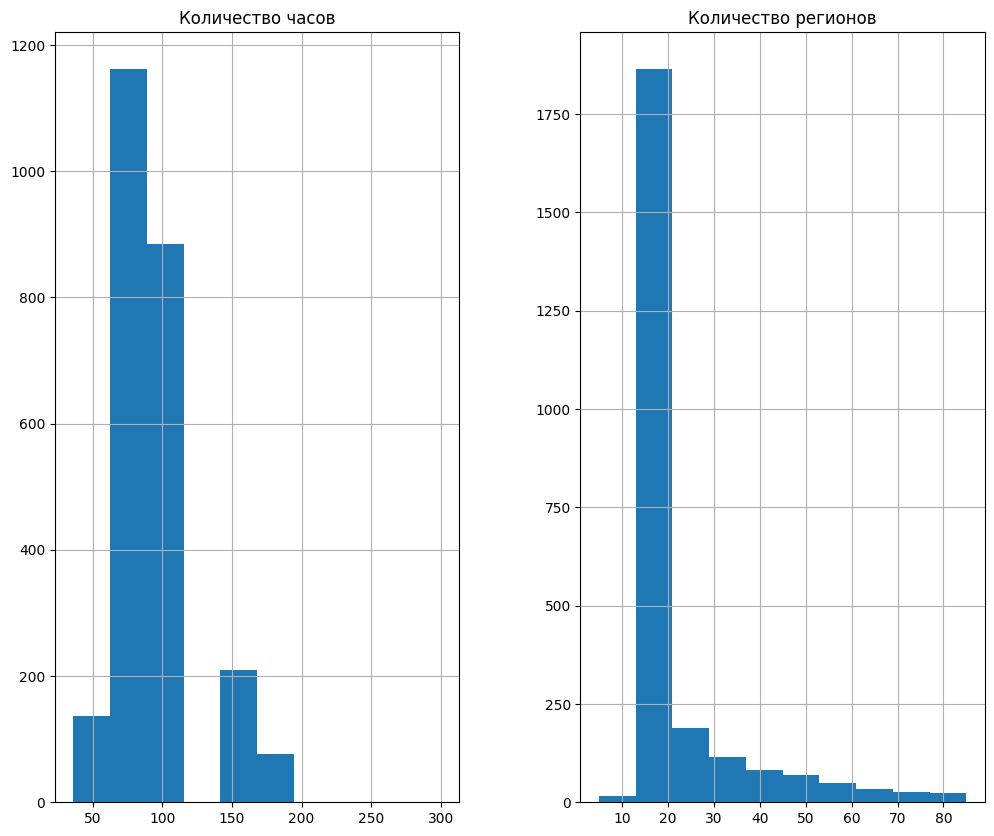

In [ ]:
df.hist(figsize=(12, 10))
plt.show()

## 1. Диаграмма рассеяния

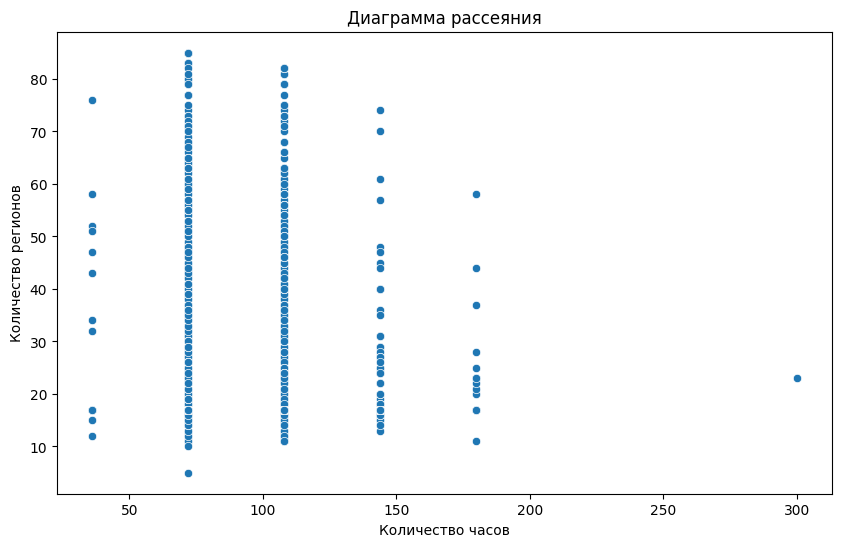

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Количество часов', y='Количество регионов')
plt.title('Диаграмма рассеяния')
plt.xlabel('Количество часов')
plt.ylabel('Количество регионов')
plt.show()


## 2. Countplot для столбца "Количество часов"

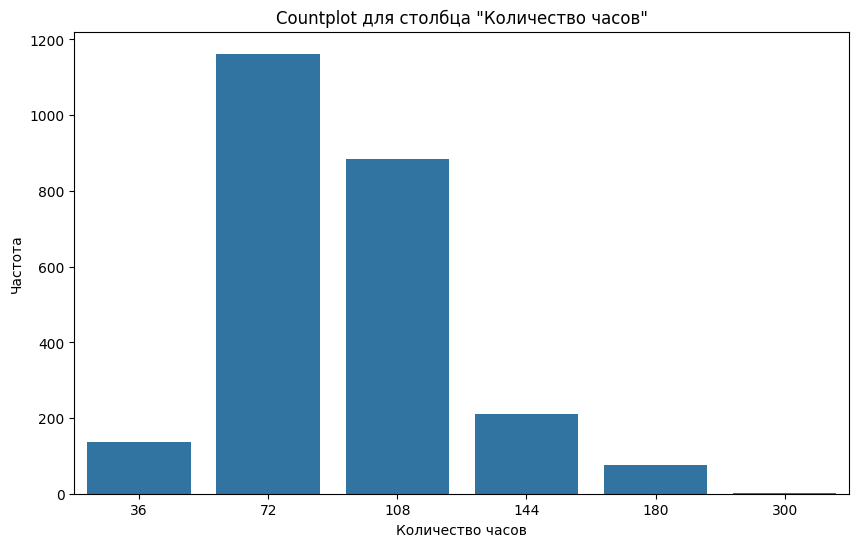

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Количество часов')
plt.title('Countplot для столбца "Количество часов"')
plt.xlabel('Количество часов')
plt.ylabel('Частота')
plt.show()

## 3. Boxplot для столбца "Количество регионов"

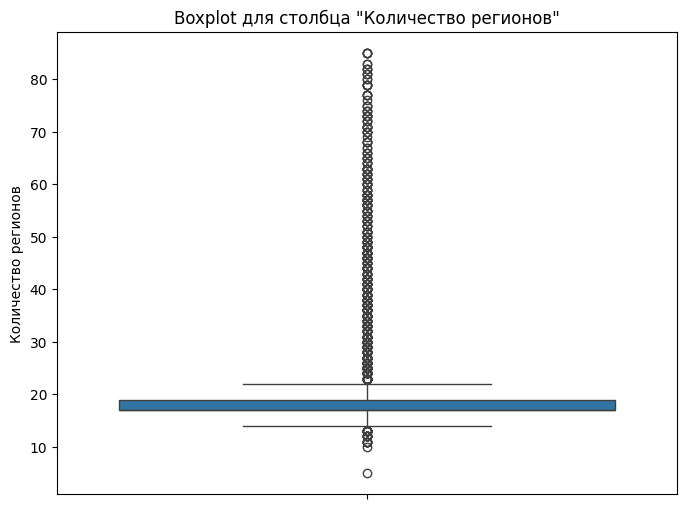

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, y='Количество регионов')
plt.title('Boxplot для столбца "Количество регионов"')
plt.ylabel('Количество регионов')
plt.show()

## 4. Круговая диаграмма для столбца "Количество часов"

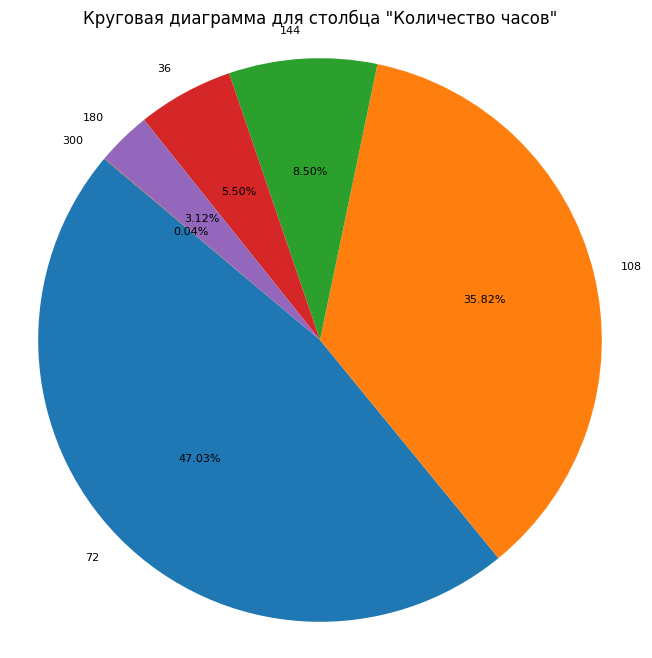

In [ ]:
# Подсчет количества уникальных значений количества часов
hours_counts = df['Количество часов'].value_counts()

# Вывод круговой диаграммы
plt.figure(figsize=(8, 8))
plt.pie(hours_counts, labels=hours_counts.index, autopct='%1.2f%%', startangle=140, textprops={'fontsize': 8})
plt.title('Круговая диаграмма для столбца "Количество часов"')
plt.axis('equal')  # Чтобы круг был кругом, а не эллипсом
plt.show()

## 5. Столбчатая диаграмма для отображения топ-100 курсов по количеству регионов

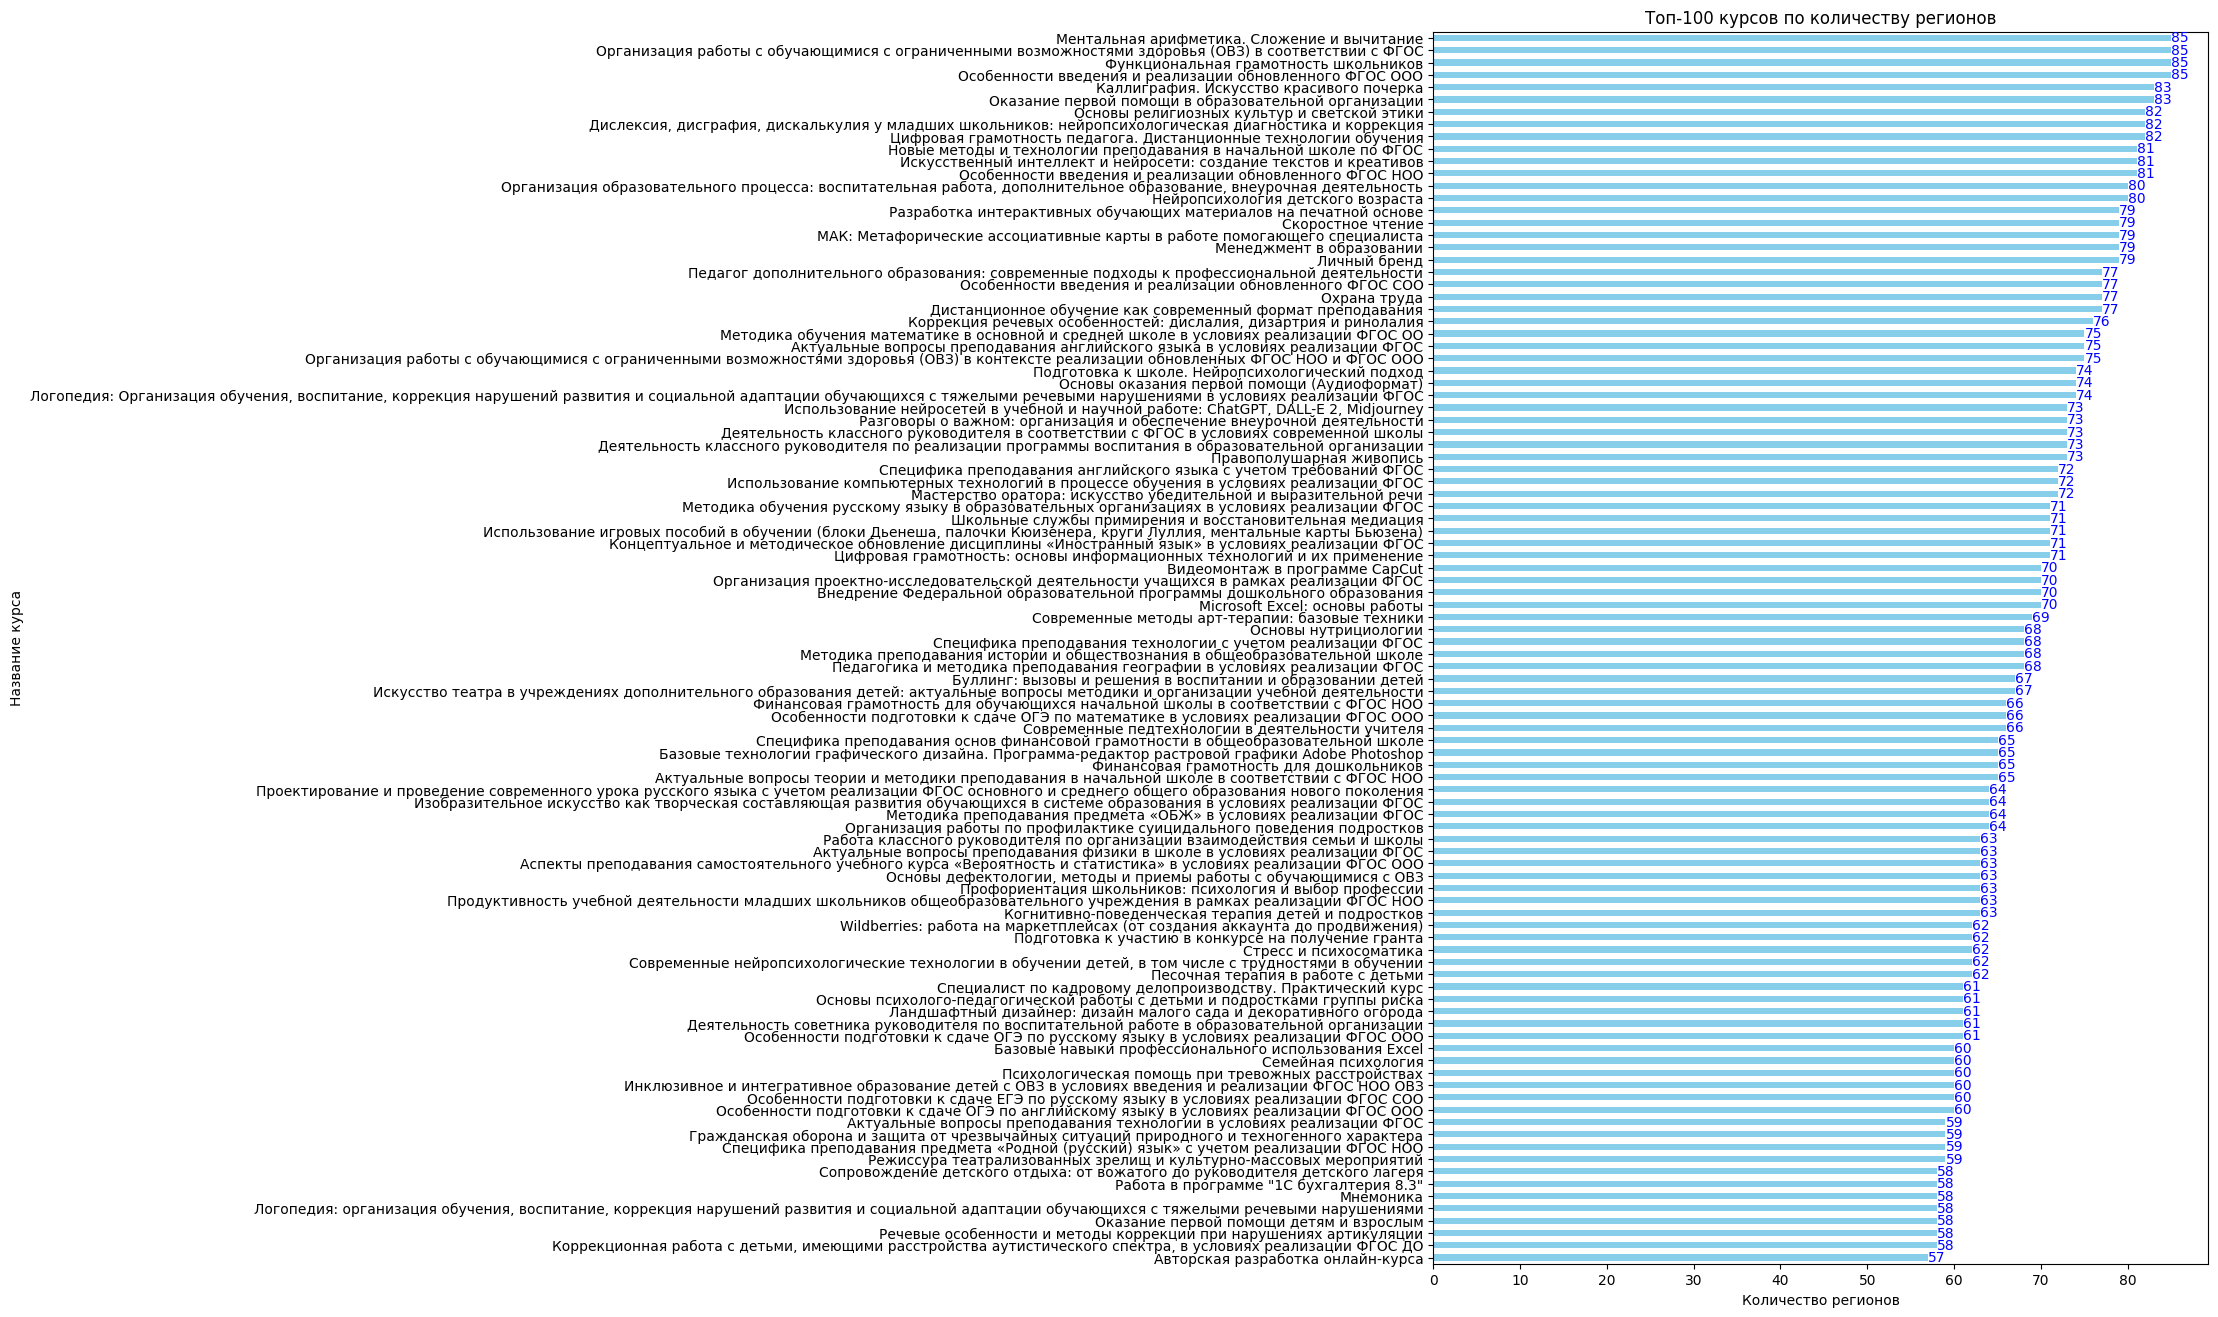

In [ ]:
# Группируем данные по курсам и среднему количеству регионов, сортируем их по убыванию
regions_counts = df.groupby('Название курса')['Количество регионов'].mean().sort_values(ascending=False)
top_regions = regions_counts.head(100)

# Строим столбчатую диаграмму
plt.figure(figsize=(10, 16))
bars = top_regions.plot(kind='barh', color='skyblue')  # Изменяем тип диаграммы на горизонтальную

# Добавляем подписи с числом регионов на полосах диаграммы
for bar in bars.patches:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'{bar.get_width():.0f}',
             va='center', ha='left', fontsize=10, color='blue')

plt.xlabel('Количество регионов')
plt.ylabel('Название курса')
plt.title('Топ-100 курсов по количеству регионов')
plt.gca().invert_yaxis()
plt.show()

## Столбчатая диаграмма для отображения топ-100 курсов по количеству часов

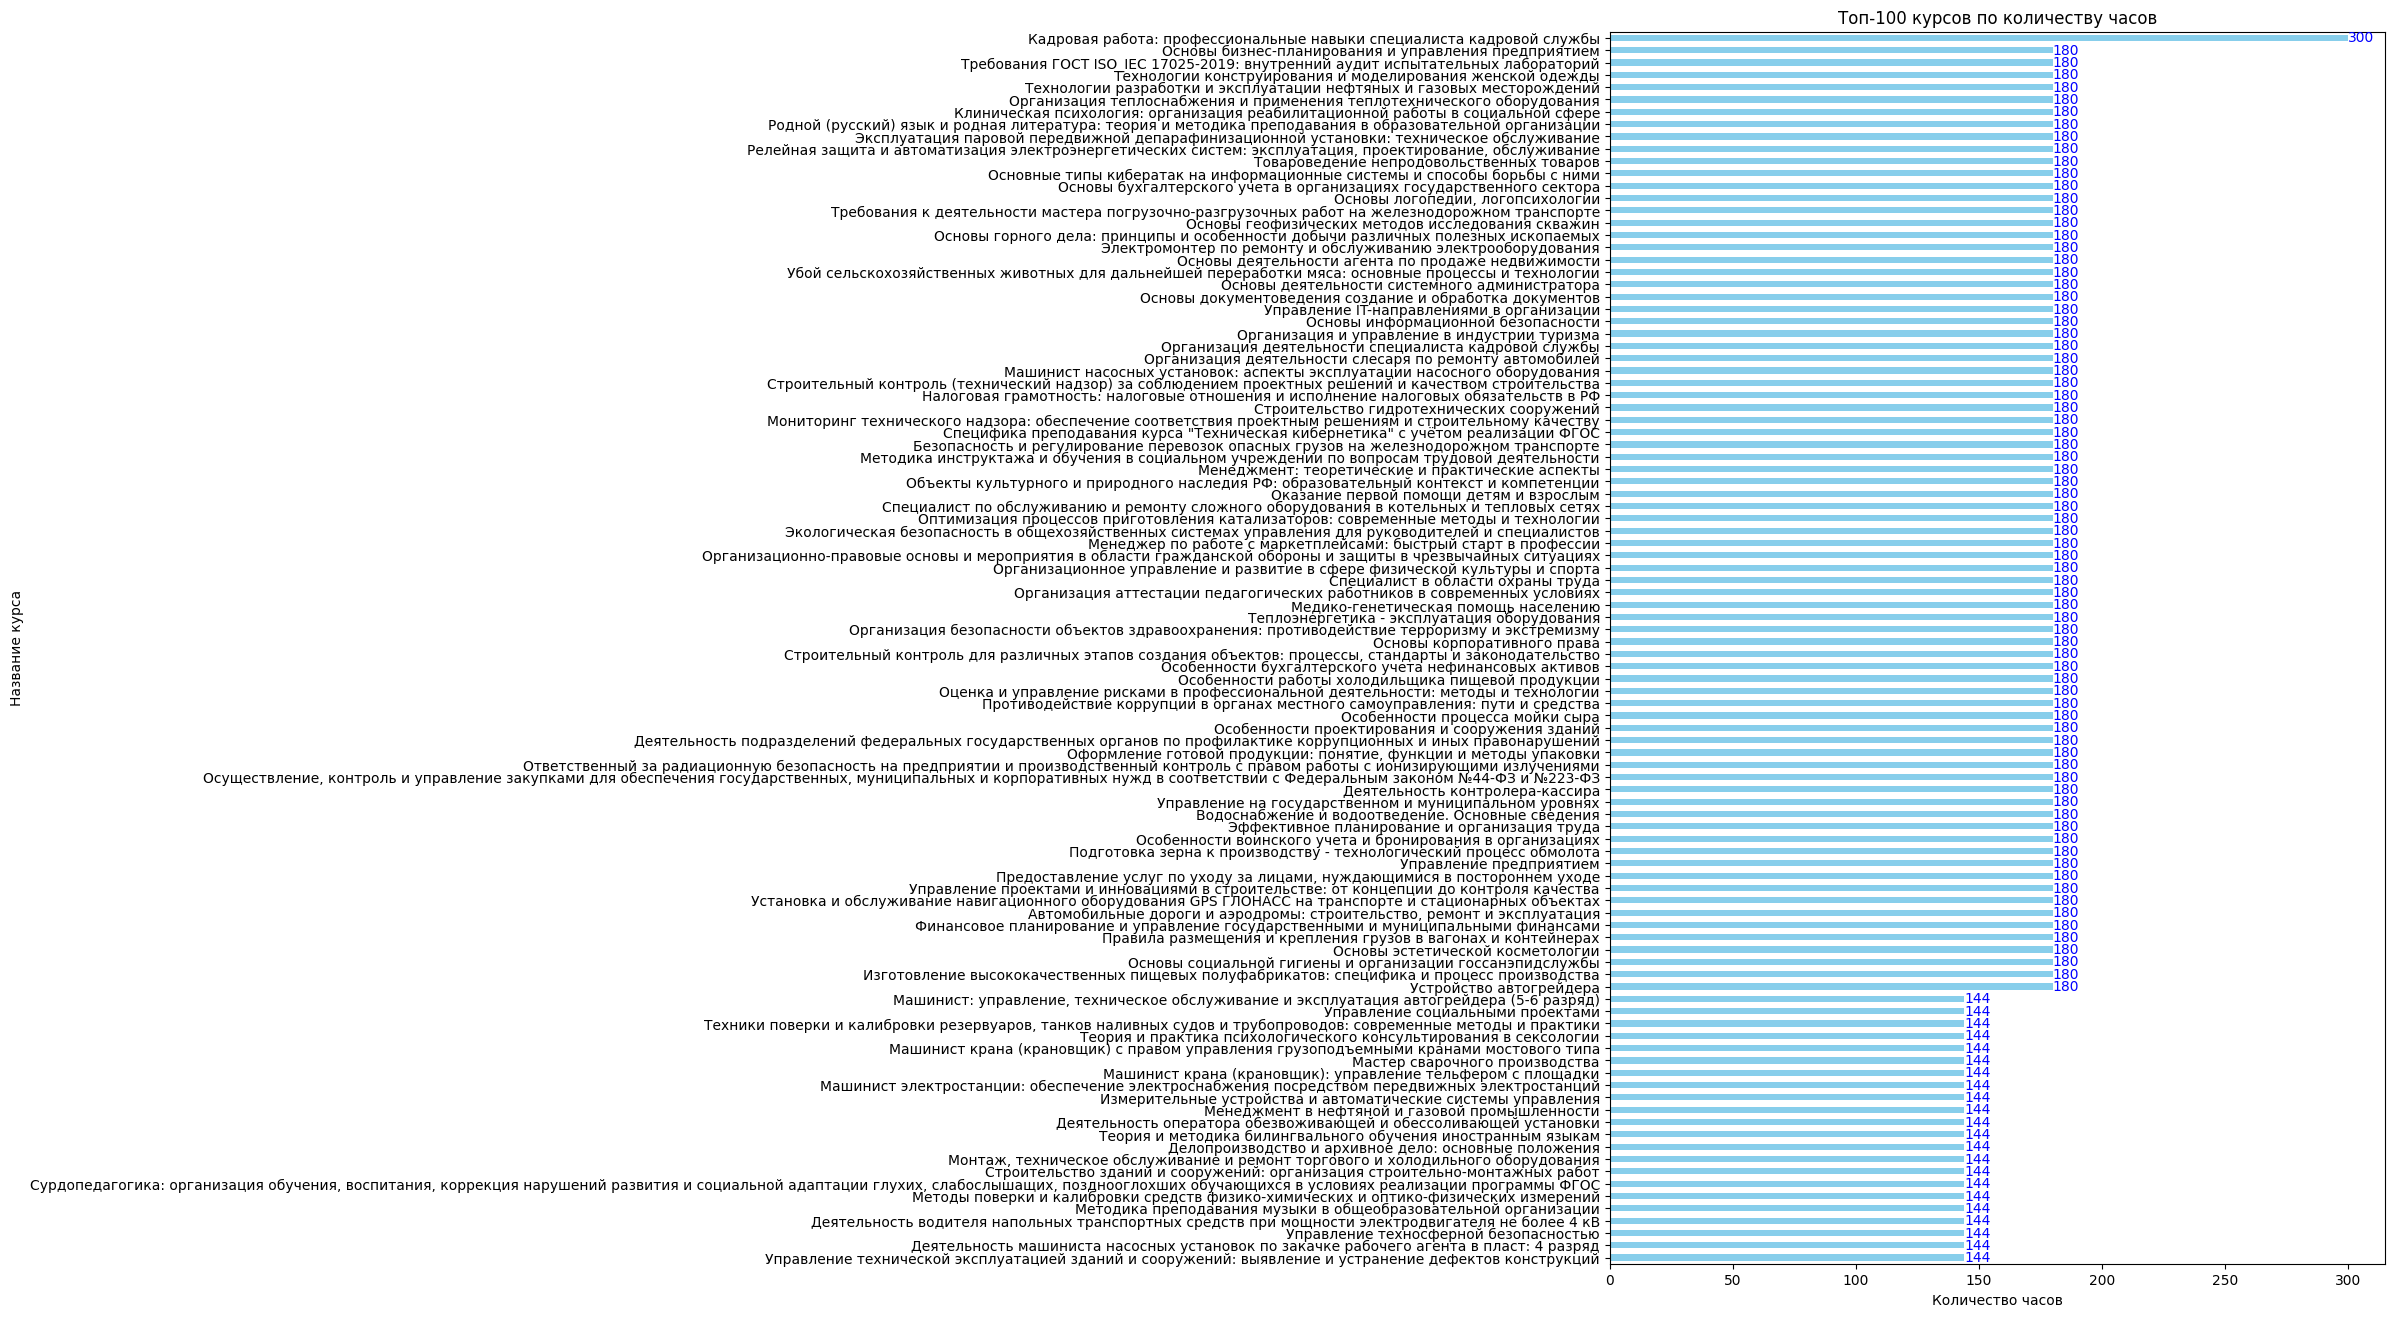

In [ ]:
# Группируем данные по курсам и среднему количеству часов, сортируем их по убыванию
hours_counts = df.groupby('Название курса')['Количество часов'].mean().sort_values(ascending=False)
top_hours = hours_counts.head(100)

# Строим столбчатую диаграмму
plt.figure(figsize=(10, 16))
bars = top_hours.plot(kind='barh', color='skyblue')  # Изменяем тип диаграммы на горизонтальную

# Добавляем подписи с числом часов на полосах диаграммы
for bar in bars.patches:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'{bar.get_width():.0f}',
             va='center', ha='left', fontsize=10, color='blue')

plt.xlabel('Количество часов')
plt.ylabel('Название курса')
plt.title('Топ-100 курсов по количеству часов')
plt.gca().invert_yaxis()
plt.show()